In [1]:
import pandas as pd

# Array
import numpy as np

# Decompress the file
import gzip

# Visualizations
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import seaborn as sns
import matplotlib.colors as colors
%matplotlib inline
from wordcloud import WordCloud, STOPWORDS

# Datetime
from datetime import datetime
# text preprocessing
import spacy
import nltk
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer, WordNetLemmatizer
from nltk.tokenize import word_tokenize, sent_tokenize, regexp_tokenize
from nltk.tokenize import RegexpTokenizer
from nltk.tokenize.toktok import ToktokTokenizer
from nltk import FreqDist
import re
from bs4 import BeautifulSoup
import contractions
import unicodedata
tokenizer = ToktokTokenizer()
nlp = spacy.load('en_core_web_sm')
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.manifold import TSNE

## Warnings
import warnings
from scipy import stats
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_json('./clean_review_headphones.json')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 61129 entries, 1260 to 1689187
Data columns (total 19 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   reviewer_id       61129 non-null  object        
 1   product_id        61129 non-null  object        
 2   reviewer_name     61129 non-null  object        
 3   rating            61129 non-null  int64         
 4   unix_review_time  61129 non-null  datetime64[ns]
 5   url               61129 non-null  object        
 6   description       61129 non-null  object        
 7   categories        61129 non-null  object        
 8   product_title     61129 non-null  object        
 9   price             61129 non-null  float64       
 10  related           61129 non-null  object        
 11  brand_name        61129 non-null  object        
 12  review_text       61129 non-null  object        
 13  pos_feedback      61129 non-null  int64         
 14  neg_feedback     

In [4]:
df.head(5)

reviewer_id  product_id  \
1260  A3UFCX1AE4TKZE  B00000DMA3   
1261  A33FS5H3CPDR6D  B00000DMA3   
1262  A1Q5M90ZZEEAL1  B00000DMA3   
1263  A1N03V52IRZ5PR  B00000DMA3   
1264  A1W5G9ITZQ64TN  B00000DMA3   

                                      reviewer_name  rating unix_review_time  \
1260                                            Ben       4       2005-01-04   
1261  Miguel Ali "Film Director & Political Pundit"       5       2005-01-24   
1262                               Niall O'Driscoll       3       2004-10-05   
1263                   N. J. Simicich "Gadget Geek"       5       2004-08-24   
1264                                  Stephen McLin       5       2005-06-05   

                                                    url  \
1260  http://ecx.images-amazon.com/images/I/5156BXCV...   
1261  http://ecx.images-amazon.com/images/I/5156BXCV...   
1262  http://ecx.images-amazon.com/images/I/5156BXCV...   
1263  http://ecx.images-amazon.com/images/I/5156BXCV...   
1264  http://ecx.images-amazon.com/images/I/5156BXCV...   

                                            description  \
1260  Retreat to a world of music, sleep on airplane...   
1261  Retreat to a world of music, sleep on airplane...   
1262  Retreat to a world of music, sleep on airplane...   
1263  Retreat to a world of music, sleep on airplane...   
1264  Retreat to a world of music, sleep on airplane...   

                                             categories  \
1260  [[Electronics, Accessories & Supplies, Audio &...   
1261  [[Electronics, Accessories & Supplies, Audio &...   
1262  [[Electronics, Accessories & Supplies, Audio &...   
1263  [[Electronics, Accessories & Supplies, Audio &...   
1264  [[Electronics, Accessories & Supplies, Audio &...   

                                          product_title   price  \
1260  Sony MDR-NC20 Noise Canceling Headphones with ...  109.94   
1261  Sony MDR-NC20 Noise Canceling Headphones with ...  109.94   
1262  Sony MDR-NC20 Noise Canceling Headphones with ...  109.94   
1263  Sony MDR-NC20 Noise Canceling Headphones with ...  109.94   
1264  Sony MDR-NC20 Noise Canceling Headphones with ...  109.94   

                                                related brand_name  \
1260  {'also_viewed': ['B000U07C1U', 'B001EYU3L2', '...       Sony   
1261  {'also_viewed': ['B000U07C1U', 'B001EYU3L2', '...       Sony   
1262  {'also_viewed': ['B000U07C1U', 'B001EYU3L2', '...       Sony   
1263  {'also_viewed': ['B000U07C1U', 'B001EYU3L2', '...       Sony   
1264  {'also_viewed': ['B000U07C1U', 'B001EYU3L2', '...       Sony   

                                            review_text  pos_feedback  \
1260  Good sound, Good Noise Cancelling, Good for ai...            11   
1261  Best Noise Cancelling Headphones I will admit ...            12   
1262  Not what I'd hoped for. I bought these thinkin...             8   
1263  The "Get Smart" Cone of Silence has finally be...             0   
1264  Great product I have used the headphones for 2...            10   

      neg_feedback rating_class  help_prop review_time  \
1260             0         good   1.000000  2005-01-04   
1261             1         good   0.923077  2005-01-24   
1262             1         good   0.888889  2004-10-05   
1263             0         good   0.000000  2004-08-24   
1264             2         good   0.833333  2005-06-05   

                                             clean_text  
1260  good sound good noise cancel good airplanes us...  
1261  best noise cancel headphones admit recently gi...  
1262  not would hop buy think ticket noisefree pleas...  
1263  get smart cone silence finally perfect own yea...  
1264  great product use headphones years offer mater...

In [5]:
df.shape

(61129, 19)

In [6]:
import pandas_profiling

In [7]:
pandas_profiling.ProfileReport(df)

Render HTML: 100%|██████████| 1/1 [00:01<00:00,  1.26s/it]


Visualizations

In [8]:
brands = df["brand_name"].value_counts()
brand_df = pd.DataFrame({'brand_name':brands[:20].index, 'frequency':brands[:20].values})
brand_df.head()

brand_name  frequency
0  Sennheiser       8056
1        Sony       7289
2   Panasonic       4492
3         JVC       3050
4        Bose       2092

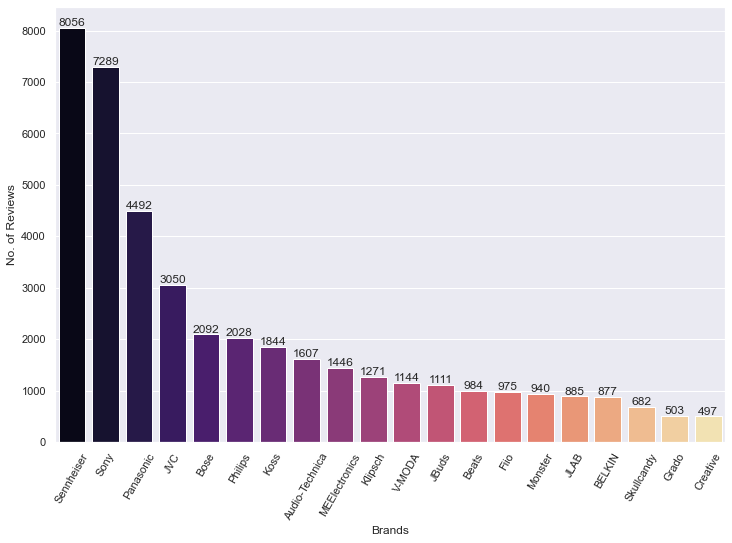

In [9]:
#NUMBER OF REVIEWS FOR TOP 20 BRANDS  
sns.set(style='darkgrid')
plt.figure(figsize=(12,8))
ax = sns.barplot(data=brand_df.reset_index(), x='brand_name', y='frequency', palette='magma')
ax.set(ylabel="No. of Reviews")
ax.set(xlabel="Brands")
ax.bar_label(ax.containers[0])
ax.set_xticklabels(ax.get_xticklabels(), rotation=60)
plt.show()

In [10]:
brand_df = pd.DataFrame({'brand_name':brands[-20:].index, 'frequency':brands[-20:].values})
brand_df.head()

brand_name  frequency
0   Sound Logic          5
1       Digital          5
2  IMC Networks          5
3     SainSmart          5
4          TRON          5

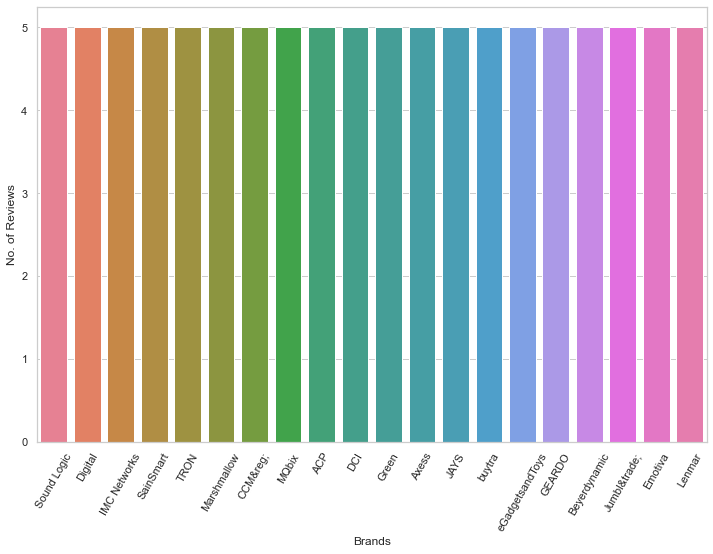

In [11]:
#NUMBER OF REVIEWS FOR BOTTOM 20 BRANDS  
sns.set(style='whitegrid')
plt.figure(figsize=(12,8))
ax = sns.barplot(data=brand_df.reset_index(), x='brand_name', y='frequency', palette='husl')
ax.set(ylabel="No. of Reviews")
ax.set(xlabel="Brands")
ax.set_xticklabels(ax.get_xticklabels(), rotation=60)
plt.show()

In [12]:
products = df["product_title"].value_counts()
products_df = pd.DataFrame({'prod_name':products[:20].index, 'frequency':products[:20].values})
products_df.head()

prod_name  frequency
0       Panasonic RPHJE120D In-Ear Headphone, Orange       2650
1  Sennheiser  RS120 On-Ear 926MHz Wireless RF He...        949
2  MEElectronics Sport-Fi M6 Noise-Isolating In-E...        769
3  Klipsch IMAGE S4 In-Ear Enhanced Bass Noise-Is...        672
4                          Bose IE2 Audio Headphones        579

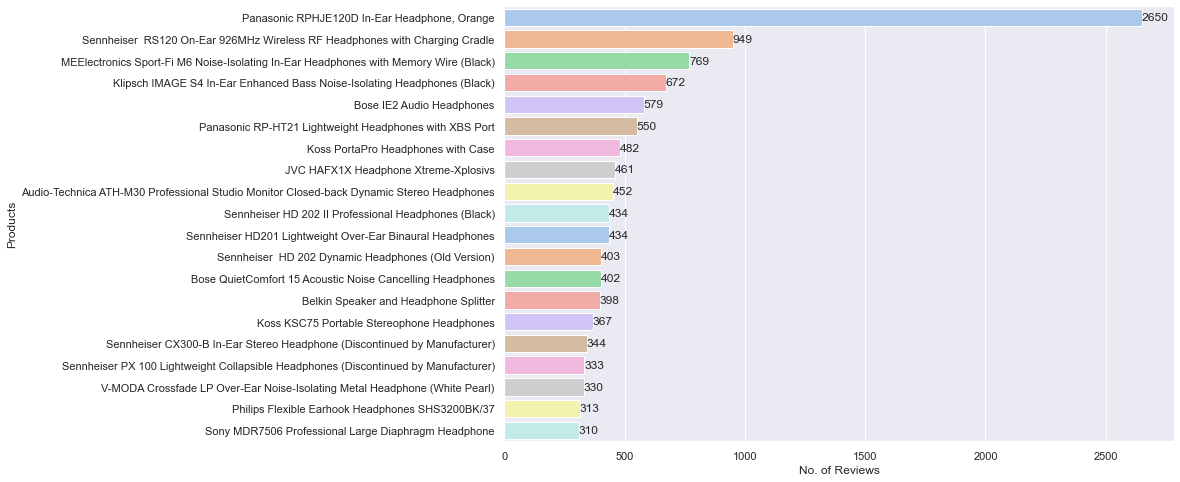

In [13]:
#NUMBER OF REVIEWS FOR TOP 20 PRODUCTS  
sns.set(style='darkgrid')
plt.figure(figsize=(12,8))
ax = sns.barplot(data=products_df.reset_index(), y='prod_name', x='frequency', palette='pastel', orient='h')
ax.set(ylabel="Products")
ax.set(xlabel="No. of Reviews")
ax.bar_label(ax.containers[0])
plt.show()

Low Ratings and Reviews

In [14]:
#j_5 = df[(df['product_id']=="B003ELYQGG") & (df['rating']<2)]
j_5 = df[(df['product_id']=="B003ELYQGG")]
j_5

reviewer_id  product_id                         reviewer_name  \
760251  A3FWI03TTRIWDP  B003ELYQGG                              1GoodDog   
760252  A1L5WUVR2RHCD6  B003ELYQGG  &#281;&#316;&#261;&#303;&#326;&#281;   
760253  A2R0GTGI2NC5P7  B003ELYQGG                          2DayShipping   
760254   AFT4I4KKUPEQP  B003ELYQGG                               2pacleo   
760255   AILMTQNLB90RV  B003ELYQGG                                  4lan   
...                ...         ...                                   ...   
762898  A24WFOTXYB6EYJ  B003ELYQGG        Z. Johnson "musician_from_cal"   
762899  A2VL97OABZOWR4  B003ELYQGG                                Zoie08   
762900  A3K9AOX3G51QP4  B003ELYQGG                              zombilex   
762901  A31Q6ALT0O5EBX  B003ELYQGG                                ZstarZ   
762902  A3IUB8248ROY5D  B003ELYQGG                                  Z.Z.   

        rating unix_review_time  \
760251       3       2014-05-11   
760252       5       2013-02-23   
760253       5       2012-11-07   
760254       3       2013-06-06   
760255       5       2013-01-19   
...        ...              ...   
762898       4       2013-04-06   
762899       5       2014-06-17   
762900       5       2013-12-23   
762901       5       2013-11-25   
762902       5       2014-07-07   

                                                      url  \
760251  http://ecx.images-amazon.com/images/I/41BqKcg6...   
760252  http://ecx.images-amazon.com/images/I/41BqKcg6...   
760253  http://ecx.images-amazon.com/images/I/41BqKcg6...   
760254  http://ecx.images-amazon.com/images/I/41BqKcg6...   
760255  http://ecx.images-amazon.com/images/I/41BqKcg6...   
...                                                   ...   
762898  http://ecx.images-amazon.com/images/I/41BqKcg6...   
762899  http://ecx.images-amazon.com/images/I/41BqKcg6...   
762900  http://ecx.images-amazon.com/images/I/41BqKcg6...   
762901  http://ecx.images-amazon.com/images/I/41BqKcg6...   
762902  http://ecx.images-amazon.com/images/I/41BqKcg6...   

                                              description  \
760251  Panasonic In-Ear Headphone Comparison ChartSeries   
760252  Panasonic In-Ear Headphone Comparison ChartSeries   
760253  Panasonic In-Ear Headphone Comparison ChartSeries   
760254  Panasonic In-Ear Headphone Comparison ChartSeries   
760255  Panasonic In-Ear Headphone Comparison ChartSeries   
...                                                   ...   
762898  Panasonic In-Ear Headphone Comparison ChartSeries   
762899  Panasonic In-Ear Headphone Comparison ChartSeries   
762900  Panasonic In-Ear Headphone Comparison ChartSeries   
762901  Panasonic In-Ear Headphone Comparison ChartSeries   
762902  Panasonic In-Ear Headphone Comparison ChartSeries   

                                               categories  \
760251  [[Electronics, Accessories & Supplies, Audio &...   
760252  [[Electronics, Accessories & Supplies, Audio &...   
760253  [[Electronics, Accessories & Supplies, Audio &...   
760254  [[Electronics, Accessories & Supplies, Audio &...   
760255  [[Electronics, Accessories & Supplies, Audio &...   
...                                                   ...   
762898  [[Electronics, Accessories & Supplies, Audio &...   
762899  [[Electronics, Accessories & Supplies, Audio &...   
762900  [[Electronics, Accessories & Supplies, Audio &...   
762901  [[Electronics, Accessories & Supplies, Audio &...   
762902  [[Electronics, Accessories & Supplies, Audio &...   

                                       product_title  price  \
760251  Panasonic RPHJE120D In-Ear Headphone, Orange   7.04   
760252  Panasonic RPHJE120D In-Ear Headphone, Orange   7.04   
760253  Panasonic RPHJE120D In-Ear Headphone, Orange   7.04   
760254  Panasonic RPHJE120D In-Ear Headphone, Orange   7.04   
760255  Panasonic RPHJE120D In-Ear Headphone, Orange   7.04   
...                                              ...    ...   
762898  Panasonic RPHJE120D In-Ear He

In [15]:
apple_fplot = j_5.groupby(['unix_review_time'])['rating'].mean()
apple_fplot

unix_review_time
2010-10-11    3.000000
2010-12-14    4.000000
2010-12-20    5.000000
2011-02-15    5.000000
2011-03-13    5.000000
                ...   
2014-07-09    4.428571
2014-07-10    4.200000
2014-07-11    5.000000
2014-07-12    4.500000
2014-07-13    4.500000
Name: rating, Length: 812, dtype: float64

In [16]:
def RegExpTokenizer(Sent):
    tokenizer = RegexpTokenizer(r'\w+')
    return tokenizer.tokenize(Sent)

ListWords = []
for m in j_5['clean_text']:
    n = RegExpTokenizer(str(m))
    ListWords.append(n)
print(ListWords[10])

['great', 'sound', 'quality', 'affordable', 'price', 'headphones', 'work', 'wonderfully', 'little', 'concern', 'inexpensive', 'cancel', 'noise', 'quite', 'effectively', 'sound', 'quality', 'seem', 'good', 'ear', 'bud', 'headphones', 'previously', 'owened']


In [17]:
def Bag_Of_Words(ListWords):
    all_words = []
    for m in ListWords:
        for w in m:
            all_words.append(w.lower())
    all_words1 = FreqDist(all_words)
    return all_words1

Words combined 7209


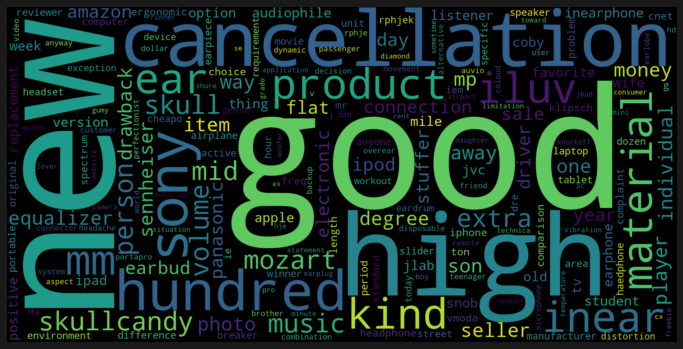

In [18]:
#from wordcloud import WordCloud
all_words4 = Bag_Of_Words(ListWords)
ax = plt.figure(figsize=(12,8),facecolor='k')
# Generate a word cloud image
wordcloud = WordCloud(width=1600, height=800,  background_color='black').generate(' '.join(all_words4.keys()))
# Display the generated image:
# the matplotlib way:
#import matplotlib.pyplot as plt
plt.tight_layout(pad=0)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
print("Words combined",len(all_words4))

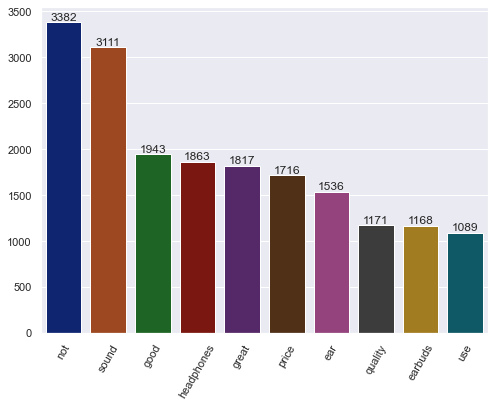

In [19]:
plt.figure(figsize = (8,6))
all_words4 = Bag_Of_Words(ListWords)
count = []
Words  = []
for w in all_words4.most_common(10):
    count.append(w[1])
    Words.append(w[0])
sns.set_palette("dark")
sns.set_style("darkgrid")
ax = sns.barplot(x=Words,y=count)
ax.bar_label(ax.containers[0])
ax.set_xticklabels(ax.get_xticklabels(), rotation=60)
plt.show()

In [20]:
j_1 = df[(df['product_id']=="B005INJ4ZG") & (df['rating']<3)]
j_1

reviewer_id  product_id                         reviewer_name  \
1149018   A95CSH4O4LBVR  B005INJ4ZG                 60srocker "60srocker"   
1149019  A1ZLZD1OUZAJIT  B005INJ4ZG                              76frakes   
1149021  A279HF3YE2K8O5  B005INJ4ZG            Allen Rosenberg "TenThumb"   
1149023  A2N3OJ1T4IKZBM  B005INJ4ZG                     anthony delmonico   
1149024  A186S5VXG48DDG  B005INJ4ZG                           A. Olafsson   
1149025  A2KDAR3YLBMPDL  B005INJ4ZG                      A. Rabiee "Rabi"   
1149027  A1N93W09O5GBFS  B005INJ4ZG                               Baddley   
1149029  A3577ERF6OVS2Y  B005INJ4ZG                                 Bfair   
1149031   AMIVH33EO7RIZ  B005INJ4ZG                      B. L. MacRitchie   
1149036  A2VRYMER23944K  B005INJ4ZG                            CAS MARINO   
1149039   A4EC2NP0PIMC9  B005INJ4ZG  Christian M. Mericle "Computer Geek"   
1149041  A1XVBACV4TSGGA  B005INJ4ZG                  Clifford J. DePriest   
1149046  A2IBUZECB34CMS  B005INJ4ZG              D. McCormick "Chief Mac"   
1149048  A3ROUCBDOMBL3A  B005INJ4ZG                                  edsi   
1149050  A2UBS120XE605X  B005INJ4ZG                           Frank Paris   
1149052  A3KI0U254V1A62  B005INJ4ZG              Fred J. Bobila "Shopper"   
1149053  A2L3TXRP4HS3ZC  B005INJ4ZG                              G. Cobos   
1149056  A39W65E6XMQCGZ  B005INJ4ZG                                   guy   
1149058  A1IR92YXL2IBJQ  B005INJ4ZG            J. A. Hernandez "jensview"   
1149059  A3H1XM9IEE7TWU  B005INJ4ZG                            J. Alberty   
1149061  A1R38PNIDDPG67  B005INJ4ZG                  Jay Bagwell "JCBIII"   
1149062  A3FFT9Q8R05L88  B005INJ4ZG                                JetLag   
1149063   AL51TV7OIZJ4G  B005INJ4ZG                 Joann L. Allen "Jody"   
1149069  A1CD3QE6MASNHH  B005INJ4ZG                            jurseygurl   
1149074   AOJ7PBSDLHJYP  B005INJ4ZG                             Katerzena   
1149078  A262ONK4P0SV0P  B005INJ4ZG      Leo A. Dubois "yankeeinparadise"   
1149079  A3GYICOW4O57DU  B005INJ4ZG                           Leroy Davis   
1149083   AC3SYMA491CW7  B005INJ4ZG                                  Mark   
1149084   A26IUBSN1D76M  B005INJ4ZG                           Mark Larson   
1149086   A5LIWNFFAX74G  B005INJ4ZG                               Maxxyne   
1149087  A24W181Y435Z9K  B005INJ4ZG           Mr. Ronald J. Mendleski Sr.   
1149088  A3GR1WOMIYHGU0  B005INJ4ZG                                 Mrs M   
1149093   AR4ANGTNDT5AL  B005INJ4ZG                          NSC "Purple"   
1149094  A2VTT2A301UY1L  B005INJ4ZG                                NT1975   
1149096  A2RU4U1JZ3DMP5  B005INJ4ZG             Omega Man "Technoanalyst"   
1149097   AVSCVWUFCUFCR  B005INJ4ZG           Patience Eddings "Patience"   
1149098   AY43C4V6HP7LB  B005INJ4ZG                  Paul Van Wagoner III   
1149100   A5NH9B5VYU57T  B005INJ4ZG                                  phil   
1149106  A3PUOGTYHLFWN2  B005INJ4ZG                                scotty   
1149110  A3PCH27PVIAX9A  B005INJ4ZG                                  Tito   
1149111   ADQD1WSC0QONA  B005INJ4ZG                         Tyler Johnson   
1149112   AN0EMR1X0SDT4  B005INJ4ZG                           ukbradstith   
1149114  A1PYMDGN9MYGAR  B005INJ4ZG                               wjones5   
1149115    AL53Z5WUHDJL  B005INJ4ZG                             W. Tanner   

         rating unix_review_time  \
1149018       1       2014-01-17   
1149019       2       2013-02-10   
1149021       1       2013-06-12   
1149023       1       2013-04-10   
1149024       1       2013-12-07   
1149025       1       2013-07-25   
1149027       1       2013-12-14   
1149029       2       2013-11-13   
1149031       1       2013-10-15   
1149036       2       2012-11-20   
1149039       1       2013-12-09   
1149041       1       2014-02-12   
1149046       1       2013-03-15   
1149048       1       2011-12-27   
114905

In [21]:
def RegExpTokenizer(Sent):
    tokenizer = RegexpTokenizer(r'\w+')
    return tokenizer.tokenize(Sent)

ListWords1 = []
for m in j_1['clean_text']:
    n = RegExpTokenizer(str(m))
    ListWords1.append(n)
print(ListWords1[1])

['headphones', 'not', 'really', 'work', 'also', 'look', 'review', 'follow', 'directions', 'still', 'could', 'not', 'get', 'work', 'not', 'even', 'send', 'back', 'throw', 'right', 'trash']


In [22]:
def Bag_Of_Words(ListWords1):
    all_words1 = []
    for m in ListWords1:
        for w in m:
            all_words1.append(w.lower())
    all_words2 = FreqDist(all_words1)
    return all_words2

Words combined 728


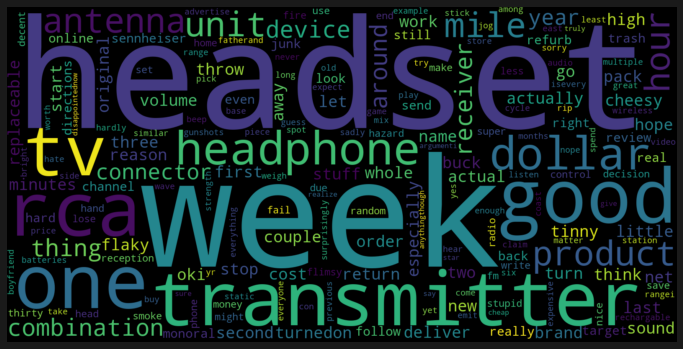

In [23]:
all_words5 = Bag_Of_Words(ListWords1)
ax = plt.figure(figsize=(12,8),facecolor='k')
# Generate a word cloud image
wordcloud = WordCloud(width=1600, height=800,  background_color='black').generate(' '.join(all_words5.keys()))
# Display the generated image:
# the matplotlib way:
#import matplotlib.pyplot as plt
plt.tight_layout(pad=0)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
print("Words combined",len(all_words5))

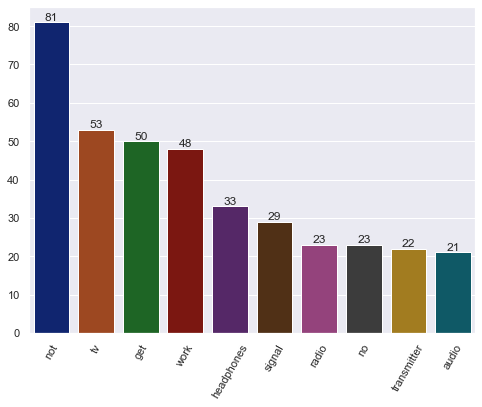

In [24]:
plt.figure(figsize = (8,6))
all_words5 = Bag_Of_Words(ListWords1)
count = []
Words  = []
for w in all_words5.most_common(10):
    count.append(w[1])
    Words.append(w[0])
sns.set_palette("dark")
sns.set_style("darkgrid")
ax = sns.barplot(x=Words,y=count)
ax.bar_label(ax.containers[0])
ax.set_xticklabels(ax.get_xticklabels(), rotation=60)
plt.show()

1. "rating_class" and "Review Length" Features

In [25]:
print(df['rating'].unique())

[4 5 3 2 1]


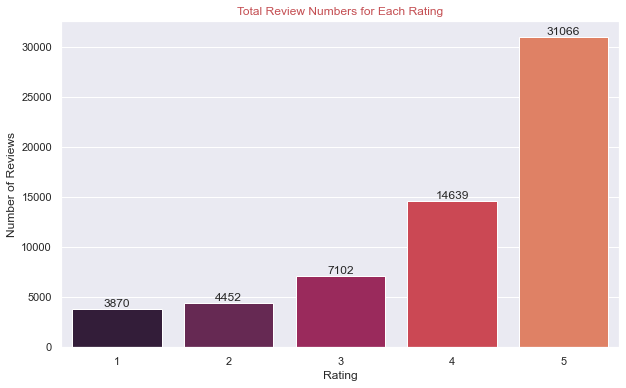

5    31066
4    14639
3     7102
2     4452
1     3870
Name: rating, dtype: int64

In [26]:
# Total numbers of ratings in the home and kitchen product reviews
plt.figure(figsize = (10,6))
sns.set_palette('rocket')
ax = sns.countplot(df['rating'].astype(int))
plt.title('Total Review Numbers for Each Rating', color='r')
plt.xlabel('Rating')
plt.ylabel('Number of Reviews')
ax.bar_label(ax.containers[0])
plt.show()

# Customer totals for each rating class
df['rating'].value_counts()

<AxesSubplot:ylabel='rating'>

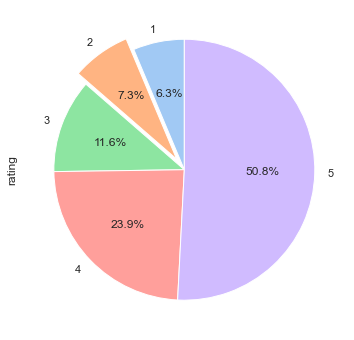

In [27]:
plt.figure(figsize = (10,6))
sns.set_palette('pastel')
df.groupby('rating').rating.count()
df.groupby('rating').rating.count().plot(kind='pie',autopct='%1.1f%%',startangle=90,explode=(0,0.1,0,0,0),)

In [28]:
word_count=[]
for s1 in df.review_text:
    word_count.append(len(str(s1).split()))

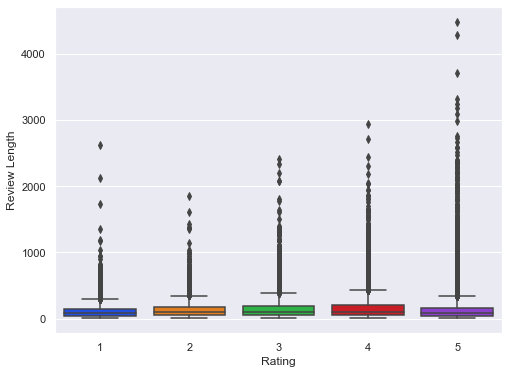

In [29]:
plt.figure(figsize = (8,6))

import seaborn as sns
import matplotlib.pyplot as plt
sns.set_palette('bright')
sns.boxplot(x="rating",y=word_count,data=df)
plt.xlabel('Rating')
plt.ylabel('Review Length')

plt.show()

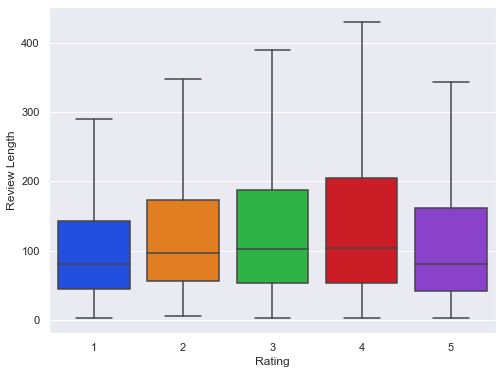

In [30]:
#The high number of outliers make it hard to visualize the median and quartiles in the previous box plot. 
#Here the outlier are removed.
plt.figure(figsize = (8,6))

sns.boxplot(x="rating",y=word_count,data=df,showfliers=False)
plt.xlabel('Rating')
plt.ylabel('Review Length')

plt.show()

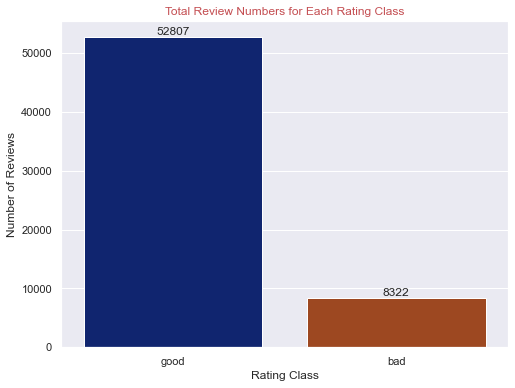

good    52807
bad      8322
Name: rating_class, dtype: int64

In [31]:
plt.figure(figsize = (8,6))
sns.set_palette('dark')
ax = sns.countplot(df['rating_class'])
plt.title('Total Review Numbers for Each Rating Class', color='r')
plt.xlabel('Rating Class')
plt.ylabel('Number of Reviews')
ax.bar_label(ax.containers[0])
plt.show()

# Customer totals for each rating class
df['rating_class'].value_counts()

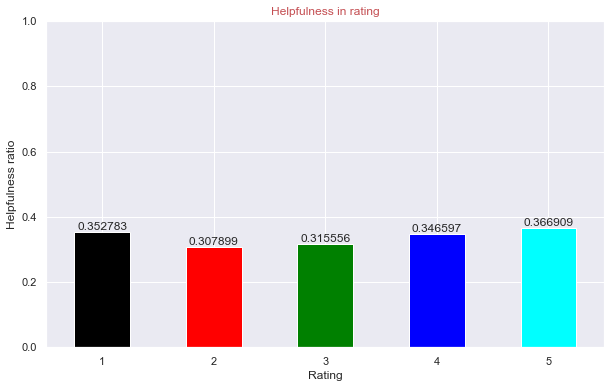

In [32]:
#DISTRIBUTION OF RATING FOR HELPFULNESS
plt.figure(figsize = (10,6))
ax = df.groupby('rating')['help_prop'].mean().plot(kind='bar', color=['black', 'red', 'green', 'blue', 'cyan'])
ax.bar_label(ax.containers[0])
plt.title("Helpfulness in rating",color='r')
plt.xlabel("Rating")
plt.ylabel("Helpfulness ratio")
plt.ylim([0, 1])
plt.xticks(rotation=0)
plt.show()

2. Features

2.1 Year Feature

In [33]:
# Create a year column and drop time column
#df['reviewtime'] = pd.to_datetime(df['time'], format = '%Y %m %d')
# Create a "year" column and drop time column
df['review_time'] = pd.to_datetime(df['review_time'])
df['year'] = df['review_time'].dt.year
df = df.drop('review_time', axis = 1)
df.head(3)

reviewer_id  product_id  \
1260  A3UFCX1AE4TKZE  B00000DMA3   
1261  A33FS5H3CPDR6D  B00000DMA3   
1262  A1Q5M90ZZEEAL1  B00000DMA3   

                                      reviewer_name  rating unix_review_time  \
1260                                            Ben       4       2005-01-04   
1261  Miguel Ali "Film Director & Political Pundit"       5       2005-01-24   
1262                               Niall O'Driscoll       3       2004-10-05   

                                                    url  \
1260  http://ecx.images-amazon.com/images/I/5156BXCV...   
1261  http://ecx.images-amazon.com/images/I/5156BXCV...   
1262  http://ecx.images-amazon.com/images/I/5156BXCV...   

                                            description  \
1260  Retreat to a world of music, sleep on airplane...   
1261  Retreat to a world of music, sleep on airplane...   
1262  Retreat to a world of music, sleep on airplane...   

                                             categories  \
1260  [[Electronics, Accessories & Supplies, Audio &...   
1261  [[Electronics, Accessories & Supplies, Audio &...   
1262  [[Electronics, Accessories & Supplies, Audio &...   

                                          product_title   price  \
1260  Sony MDR-NC20 Noise Canceling Headphones with ...  109.94   
1261  Sony MDR-NC20 Noise Canceling Headphones with ...  109.94   
1262  Sony MDR-NC20 Noise Canceling Headphones with ...  109.94   

                                                related brand_name  \
1260  {'also_viewed': ['B000U07C1U', 'B001EYU3L2', '...       Sony   
1261  {'also_viewed': ['B000U07C1U', 'B001EYU3L2', '...       Sony   
1262  {'also_viewed': ['B000U07C1U', 'B001EYU3L2', '...       Sony   

                                            review_text  pos_feedback  \
1260  Good sound, Good Noise Cancelling, Good for ai...            11   
1261  Best Noise Cancelling Headphones I will admit ...            12   
1262  Not what I'd hoped for. I bought these thinkin...             8   

      neg_feedback rating_class  help_prop  \
1260             0         good   1.000000   
1261             1         good   0.923077   
1262             1         good   0.888889   

                                             clean_text  year  
1260  good sound good noise cancel good airplanes us...  2005  
1261  best noise cancel headphones admit recently gi...  2005  
1262  not would hop buy think ticket noisefree pleas...  2004

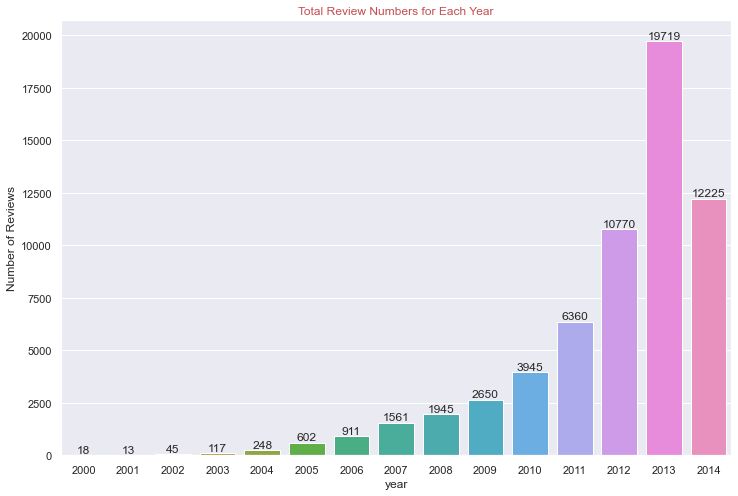

2013    19719
2014    12225
2012    10770
2011     6360
2010     3945
2009     2650
2008     1945
2007     1561
2006      911
2005      602
2004      248
2003      117
2002       45
2000       18
2001       13
Name: year, dtype: int64

In [34]:
# Total review for every year in the Headphone product
plt.figure(figsize = (12,8))
sns.set_palette('muted')
ax = sns.countplot(df['year'])
ax.bar_label(ax.containers[0])
plt.title('Total Review Numbers for Each Year', color='r')
plt.xlabel('year')
plt.ylabel('Number of Reviews')
plt.show()

# Customer totals for each rating class
df['year'].value_counts()

2.2. "customer" Feature

In [35]:
print('Number of unique customers: {}'.format(len(df['reviewer_id'].unique())))

Number of unique customers: 42062


In [36]:
unique_cust = df.groupby('year')['reviewer_id'].nunique()
unique_cust_df = pd.DataFrame({'year':unique_cust.index, 'frequency':unique_cust.values})

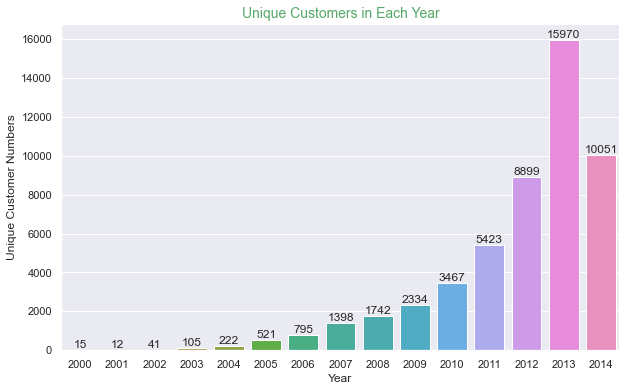

year
2000       15
2001       12
2002       41
2003      105
2004      222
2005      521
2006      795
2007     1398
2008     1742
2009     2334
2010     3467
2011     5423
2012     8899
2013    15970
2014    10051
Name: reviewer_id, dtype: int64


In [37]:
# Plot unique customer numbers in each year
plt.figure(figsize = (10,6))
ax = sns.barplot(data=unique_cust_df,x='year',y='frequency')
ax.bar_label(ax.containers[0])
plt.title('Unique Customers in Each Year', color='g', size = 14)
plt.xlabel('Year')
plt.ylabel('Unique Customer Numbers')
plt.show()
# Print unique customer numbers in each year
print(unique_cust)

In [38]:
# unique customers for each "rating class"
a = list(df.groupby(['rating_class'])['reviewer_id'].unique())  

# number of customers
a2 = [len(a[0]),len(a[1])] 

# number of reviews for each "rating class"
b = list(df['rating_class'].value_counts())              

uniq_cust_rate = pd.DataFrame({'rating_class': ['bad', 'good'],
                               'number_of_customers': a2,
                               'number_of_reviews': sorted(b)})
print(uniq_cust_rate)

  rating_class  number_of_customers  number_of_reviews
0          bad                 7424               8322
1         good                37696              52807


2.3 "product" Feature

In [39]:
print('Number of unique products: {}'.format(len(df['product_id'].unique())))

Number of unique products: 1878


In [40]:
unique_prod = df.groupby('year')['product_id'].nunique()
unique_prod_df = pd.DataFrame({'year':unique_prod.index, 'frequency':unique_prod.values})

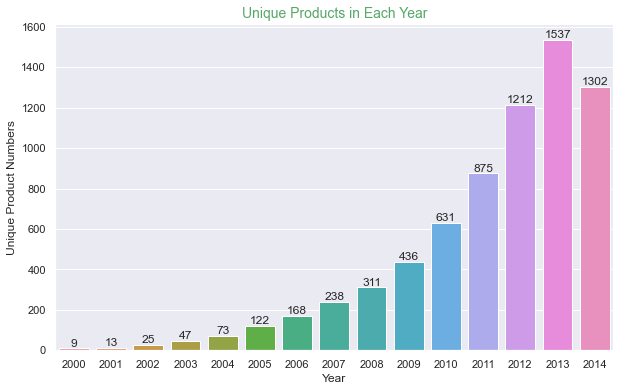

In [41]:
plt.figure(figsize = (10,6))
ax = sns.barplot(data=unique_prod_df,x='year',y='frequency')
ax.bar_label(ax.containers[0])
plt.title('Unique Products in Each Year', color = 'g', size = 14)
plt.xlabel('Year')
plt.ylabel('Unique Product Numbers')
plt.show()

2.4 "review_length" Feature

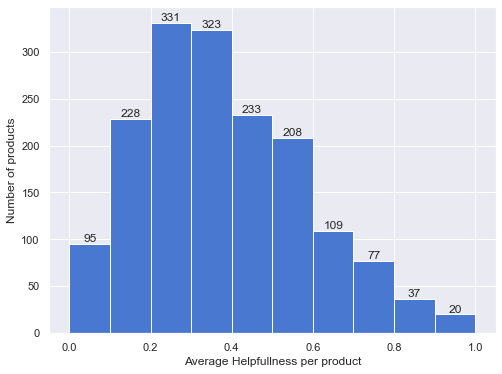

In [42]:
#DISTRIBUTION OF RATING IN PRODUCTS
plt.figure(figsize = (8,6))
df1 = df.copy()
df1 = df1[np.isfinite(df1['help_prop'])]
grp = df1.groupby('product_id')
counts = grp.product_id.count()        
means = grp.help_prop.mean()     
ax = means[counts > 5].hist(bins=10, edgecolor='w', lw=1)
ax.bar_label(ax.containers[0])
plt.xlabel("Average Helpfullness per product")
plt.ylabel("Number of products")
plt.show()

In [43]:
df1['text_len'] = df1.review_text.apply(len)
maxTextLen = max(df1.text_len)
bins = df1.groupby(pd.cut(df1['text_len'], np.arange(0,maxTextLen+1000,1000)))['help_prop'].mean()
bins_df = pd.DataFrame({'help':bins.index, 'frequency':bins.values})

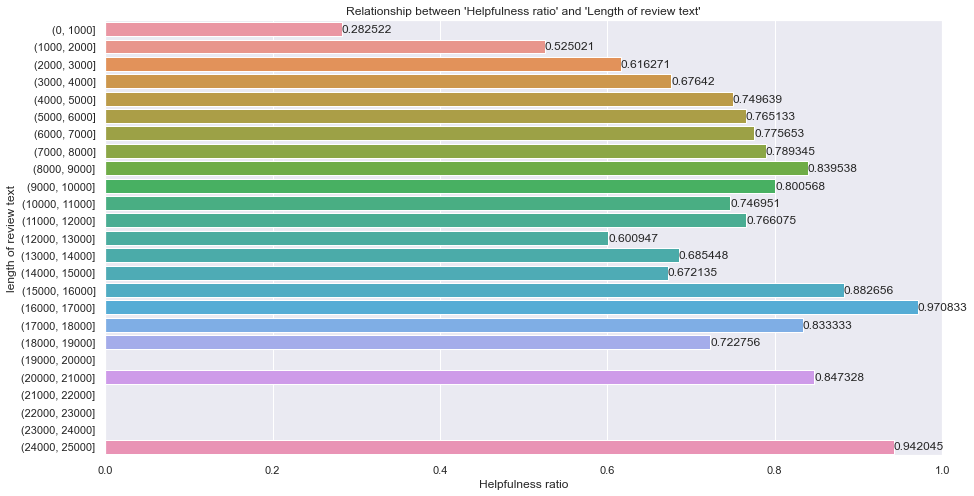

In [44]:
#HELPFULNESS FOR LENGTH OF TEXT
plt.figure(figsize = (15,8))
ax = sns.barplot(data=bins_df,y="help",x="frequency",orient='h')
ax.bar_label(ax.containers[0])
plt.ylabel("length of review text")
plt.xlabel("Helpfulness ratio")
plt.title("Relationship between 'Helpfulness ratio' and 'Length of review text'")
plt.xlim([0, 1])

plt.show()

Text(0, 0.5, 'Number of Reviews')

<Figure size 1080x576 with 0 Axes>

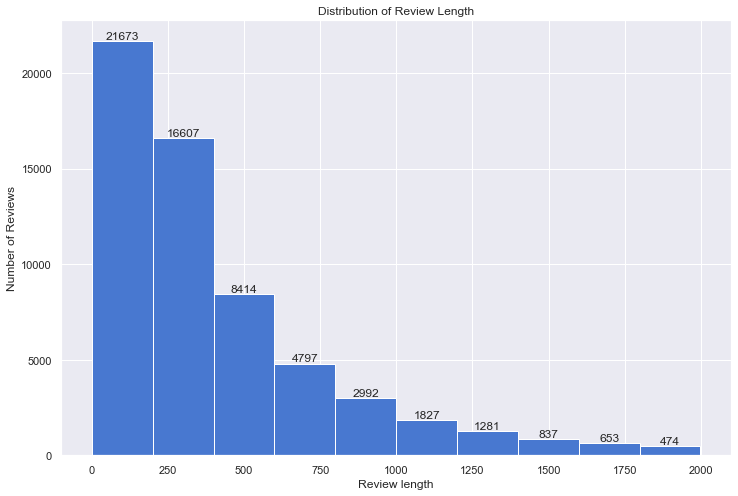

In [45]:
#PLOT DISTRIBUTION OF REVIEW LENGTH   
plt.figure(figsize = (15,8))
review_length = df["clean_text"].dropna().map(lambda x: len(x))
plt.figure(figsize=(12,8))
ax = review_length.loc[review_length < 2000].hist()
ax.bar_label(ax.containers[0])
plt.title("Distribution of Review Length")
plt.xlabel('Review length')
plt.ylabel('Number of Reviews')

Relation between word count of reviews and level of helpfulness

In [46]:
df1['text_len'] = df1.review_text.apply(len)
maxTextLen = 2000
bins = df1.groupby(pd.cut(df1['text_len'], np.arange(0,maxTextLen,100)))['help_prop'].mean()
bins_df = pd.DataFrame({'help':bins.index, 'frequency':bins.values})

(0.0, 0.7)

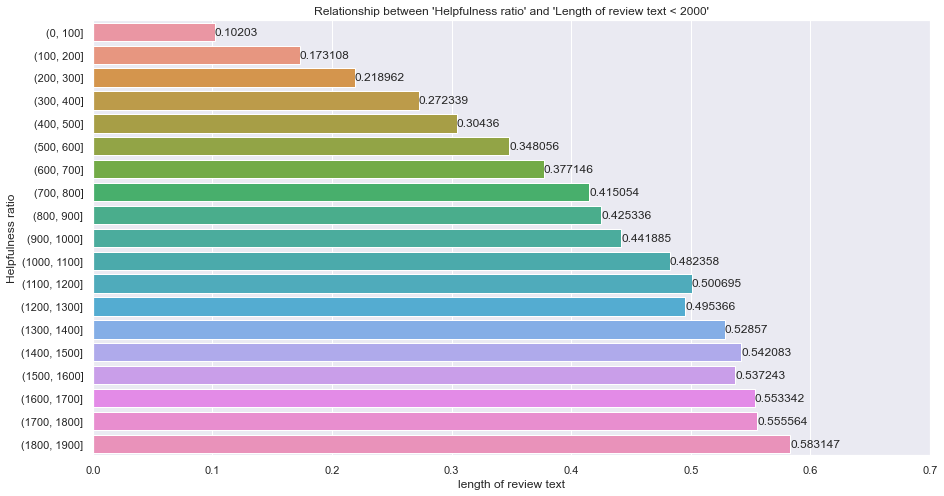

In [47]:
#check helpfulness ration below 2000 words
plt.figure(figsize = (15,8))
ax = sns.barplot(data=bins_df,y="help",x="frequency",orient='h')
ax.bar_label(ax.containers[0])
plt.xlabel("length of review text")
plt.ylabel("Helpfulness ratio")
plt.title("Relationship between 'Helpfulness ratio' and 'Length of review text < 2000'")
plt.xlim([0,0.7])

In [48]:
#LABEL HELPFULNESS
def label_Helpfulness(row):
    if row['help_prop'] > 0.75:
           return 'helpful'
    else: 
           return 'unhelpful'
df1['helpIndx'] = df1.apply(label_Helpfulness, axis=1)
df1.head(2)

reviewer_id  product_id  \
1260  A3UFCX1AE4TKZE  B00000DMA3   
1261  A33FS5H3CPDR6D  B00000DMA3   

                                      reviewer_name  rating unix_review_time  \
1260                                            Ben       4       2005-01-04   
1261  Miguel Ali "Film Director & Political Pundit"       5       2005-01-24   

                                                    url  \
1260  http://ecx.images-amazon.com/images/I/5156BXCV...   
1261  http://ecx.images-amazon.com/images/I/5156BXCV...   

                                            description  \
1260  Retreat to a world of music, sleep on airplane...   
1261  Retreat to a world of music, sleep on airplane...   

                                             categories  \
1260  [[Electronics, Accessories & Supplies, Audio &...   
1261  [[Electronics, Accessories & Supplies, Audio &...   

                                          product_title   price  ...  \
1260  Sony MDR-NC20 Noise Canceling Headphones with ...  109.94  ...   
1261  Sony MDR-NC20 Noise Canceling Headphones with ...  109.94  ...   

     brand_name                                        review_text  \
1260       Sony  Good sound, Good Noise Cancelling, Good for ai...   
1261       Sony  Best Noise Cancelling Headphones I will admit ...   

     pos_feedback  neg_feedback  rating_class help_prop  \
1260           11             0          good  1.000000   
1261           12             1          good  0.923077   

                                             clean_text  year  text_len  \
1260  good sound good noise cancel good airplanes us...  2005      1884   
1261  best noise cancel headphones admit recently gi...  2005       834   

      helpIndx  
1260   helpful  
1261   helpful  

[2 rows x 21 columns]

In [49]:
subset_df1 = df1[(df1.neg_feedback>=2) & (df1.text_len>=2)]
subset_df1.text_len[subset_df1.text_len<2000]

1264        276
1450        614
1516        296
1521        903
3527       1148
           ... 
1686267     958
1686780     539
1688173     220
1688187     661
1688188     359
Name: text_len, Length: 4886, dtype: int64

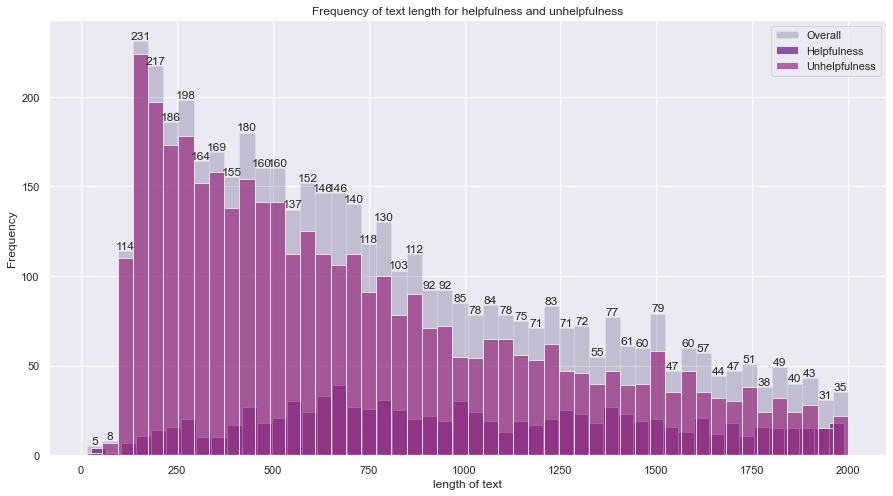

In [50]:
#TEXT LENGTH  
plt.figure(figsize = (15,8))
sns.set_palette('magma')
subset_df1 = df1[(df1.neg_feedback>=2) & (df1.text_len>=2)]
a1 = subset_df1.text_len[subset_df1.text_len<2000].plot(bins=50, kind='hist',alpha=0.2)
dhelp = subset_df1.text_len[(subset_df1['helpIndx']=='helpful') & (subset_df1.text_len<2000)]
dunhelp = subset_df1.text_len[(subset_df1['helpIndx']=='unhelpful') & (subset_df1.text_len<2000)]
a2 = dhelp.plot(bins=50, kind='hist', alpha=0.7)
a3 = dunhelp.plot(bins=50, kind='hist',alpha=0.7)
a1.bar_label(a1.containers[0])
plt.legend(['Overall', 'Helpfulness', 'Unhelpfulness'])
plt.xlabel("length of text")
plt.ylabel("Frequency")
plt.title("Frequency of text length for helpfulness and unhelpfulness")
plt.show()

In [51]:
df['rating_class_num'] = df['rating_class'].map({'good': 1, 'bad': 0}) 
feature = df.groupby('year').agg({'rating_class_num':['size', 'sum', 'mean']})
feature.columns = [' '.join(col).strip() for col in feature.columns.values]
feature = feature.reset_index()
feature['rating_class_num mean'] = feature['rating_class_num mean']*100
feature.columns = ['Year', 'Total Reviews', 'Relevant Rating Number', 
                       '% of Relevant Rating Number in This Year'] 
feature['% of Relevant Rating in the Total'] = (feature['Relevant Rating Number'] / 22425)*100        
feature

Year  Total Reviews  Relevant Rating Number  \
0   2000             18                      16   
1   2001             13                       9   
2   2002             45                      39   
3   2003            117                     101   
4   2004            248                     201   
5   2005            602                     488   
6   2006            911                     765   
7   2007           1561                    1318   
8   2008           1945                    1650   
9   2009           2650                    2216   
10  2010           3945                    3335   
11  2011           6360                    5383   
12  2012          10770                    9208   
13  2013          19719                   17358   
14  2014          12225                   10720   

    % of Relevant Rating Number in This Year  \
0                                  88.888889   
1                                  69.230769   
2                                  86.666667   
3                                  86.324786   
4                                  81.048387   
5                                  81.063123   
6                                  83.973655   
7                                  84.433056   
8                                  84.832905   
9                                  83.622642   
10                                 84.537389   
11                                 84.638365   
12                                 85.496750   
13                                 88.026776   
14                                 87.689162   

    % of Relevant Rating in the Total  
0                            0.071349  
1                            0.040134  
2                            0.173913  
3                            0.450390  
4                            0.896321  
5                            2.176143  
6                            3.411371  
7                            5.877369  
8                            7.357860  
9                            9.881828  
10                          14.871795  
11                          24.004459  
12                          41.061315  
13                          77.404682  
14                          47.803790

<Figure size 864x576 with 0 Axes>

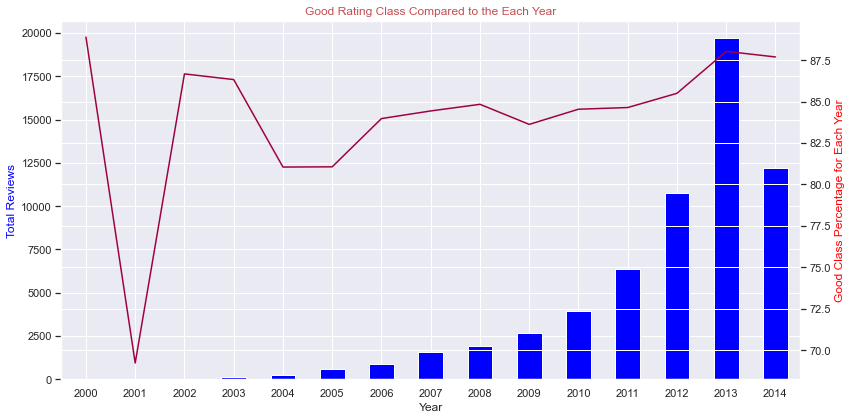

In [52]:
df['rating_class_num'] = df['rating_class'].map({'good': 1, 'bad': 0})

feature = df.groupby('year').agg({'rating_class_num':['size', 'sum', 'mean']})
feature.columns = [' '.join(col).strip() for col in feature.columns.values]
feature = feature.reset_index()
feature['rating_class_num mean'] = feature['rating_class_num mean']*100
feature.columns = ['Year', 'Total Reviews', 'Relevant Rating Number', 
                    '% of Relevant Rating Number in This Year'] 
plt.figure(figsize = (12,8))
fig0, ax1 = plt.subplots(figsize = (12,6))
ax2 = ax1.twinx()
feature.set_index(feature['Year'], drop=True, inplace=True)
feature["Total Reviews"].plot(kind = 'bar', stacked = True, ax = ax1, colormap = 'winter', rot=0)
feature['% of Relevant Rating Number in This Year'].plot(use_index = False, 
                                                         kind = 'line', ax = ax2, colormap='Spectral')   

plt.title('Good Rating Class Compared to the Each Year', color='r')
ax1.set_xlabel('Year')
ax1.yaxis.label.set_color('blue')
ax1.set_ylabel("Total Reviews")
ax2.set_ylabel("Good Class Percentage for Each Year")
ax2.yaxis.label.set_color('red')
plt.tight_layout()
plt.show()

In [53]:
# Function for creating a column token
def token (text):
    token = [w for w in nltk.word_tokenize(text)]
    return token
# To create token feature
df['token'] = df['clean_text'].apply(token)

In [54]:
# Function for creating a column to see the length of the review text
def length(text):
    length = len([w for w in nltk.word_tokenize(text)])
    return length

# Apply length function to create review length feature
df['review_length'] = df['review_text'].apply(length)
df.head(3)

reviewer_id  product_id  \
1260  A3UFCX1AE4TKZE  B00000DMA3   
1261  A33FS5H3CPDR6D  B00000DMA3   
1262  A1Q5M90ZZEEAL1  B00000DMA3   

                                      reviewer_name  rating unix_review_time  \
1260                                            Ben       4       2005-01-04   
1261  Miguel Ali "Film Director & Political Pundit"       5       2005-01-24   
1262                               Niall O'Driscoll       3       2004-10-05   

                                                    url  \
1260  http://ecx.images-amazon.com/images/I/5156BXCV...   
1261  http://ecx.images-amazon.com/images/I/5156BXCV...   
1262  http://ecx.images-amazon.com/images/I/5156BXCV...   

                                            description  \
1260  Retreat to a world of music, sleep on airplane...   
1261  Retreat to a world of music, sleep on airplane...   
1262  Retreat to a world of music, sleep on airplane...   

                                             categories  \
1260  [[Electronics, Accessories & Supplies, Audio &...   
1261  [[Electronics, Accessories & Supplies, Audio &...   
1262  [[Electronics, Accessories & Supplies, Audio &...   

                                          product_title   price  ...  \
1260  Sony MDR-NC20 Noise Canceling Headphones with ...  109.94  ...   
1261  Sony MDR-NC20 Noise Canceling Headphones with ...  109.94  ...   
1262  Sony MDR-NC20 Noise Canceling Headphones with ...  109.94  ...   

                                            review_text pos_feedback  \
1260  Good sound, Good Noise Cancelling, Good for ai...           11   
1261  Best Noise Cancelling Headphones I will admit ...           12   
1262  Not what I'd hoped for. I bought these thinkin...            8   

     neg_feedback  rating_class  help_prop  \
1260            0          good   1.000000   
1261            1          good   0.923077   
1262            1          good   0.888889   

                                             clean_text  year  \
1260  good sound good noise cancel good airplanes us...  2005   
1261  best noise cancel headphones admit recently gi...  2005   
1262  not would hop buy think ticket noisefree pleas...  2004   

     rating_class_num                                              token  \
1260                1  [good, sound, good, noise, cancel, good, airpl...   
1261                1  [best, noise, cancel, headphones, admit, recen...   
1262                1  [not, would, hop, buy, think, ticket, noisefre...   

      review_length  
1260            375  
1261            161  
1262            167  

[3 rows x 22 columns]

In [55]:
# Create review length bin feature
df['review_length_bin'] = pd.cut(df['review_length'], np.arange(0,4800,100))
df.head()

reviewer_id  product_id  \
1260  A3UFCX1AE4TKZE  B00000DMA3   
1261  A33FS5H3CPDR6D  B00000DMA3   
1262  A1Q5M90ZZEEAL1  B00000DMA3   
1263  A1N03V52IRZ5PR  B00000DMA3   
1264  A1W5G9ITZQ64TN  B00000DMA3   

                                      reviewer_name  rating unix_review_time  \
1260                                            Ben       4       2005-01-04   
1261  Miguel Ali "Film Director & Political Pundit"       5       2005-01-24   
1262                               Niall O'Driscoll       3       2004-10-05   
1263                   N. J. Simicich "Gadget Geek"       5       2004-08-24   
1264                                  Stephen McLin       5       2005-06-05   

                                                    url  \
1260  http://ecx.images-amazon.com/images/I/5156BXCV...   
1261  http://ecx.images-amazon.com/images/I/5156BXCV...   
1262  http://ecx.images-amazon.com/images/I/5156BXCV...   
1263  http://ecx.images-amazon.com/images/I/5156BXCV...   
1264  http://ecx.images-amazon.com/images/I/5156BXCV...   

                                            description  \
1260  Retreat to a world of music, sleep on airplane...   
1261  Retreat to a world of music, sleep on airplane...   
1262  Retreat to a world of music, sleep on airplane...   
1263  Retreat to a world of music, sleep on airplane...   
1264  Retreat to a world of music, sleep on airplane...   

                                             categories  \
1260  [[Electronics, Accessories & Supplies, Audio &...   
1261  [[Electronics, Accessories & Supplies, Audio &...   
1262  [[Electronics, Accessories & Supplies, Audio &...   
1263  [[Electronics, Accessories & Supplies, Audio &...   
1264  [[Electronics, Accessories & Supplies, Audio &...   

                                          product_title   price  ...  \
1260  Sony MDR-NC20 Noise Canceling Headphones with ...  109.94  ...   
1261  Sony MDR-NC20 Noise Canceling Headphones with ...  109.94  ...   
1262  Sony MDR-NC20 Noise Canceling Headphones with ...  109.94  ...   
1263  Sony MDR-NC20 Noise Canceling Headphones with ...  109.94  ...   
1264  Sony MDR-NC20 Noise Canceling Headphones with ...  109.94  ...   

     pos_feedback neg_feedback rating_class  help_prop  \
1260           11            0         good   1.000000   
1261           12            1         good   0.923077   
1262            8            1         good   0.888889   
1263            0            0         good   0.000000   
1264           10            2         good   0.833333   

                                             clean_text  year  \
1260  good sound good noise cancel good airplanes us...  2005   
1261  best noise cancel headphones admit recently gi...  2005   
1262  not would hop buy think ticket noisefree pleas...  2004   
1263  get smart cone silence finally perfect own yea...  2004   
1264  great product use headphones years offer mater...  2005   

      rating_class_num                                              token  \
1260                 1  [good, sound, good, noise, cancel, good, airpl...   
1261                 1  [best, noise, cancel, headphones, admit, recen...   
1262                 1  [not, would, hop, buy, think, ticket, noisefre...   
1263                 1  [get, smart, cone, silence, finally, perfect, ...   
1264                 1  [great, product, use, headphones, years, offer...   

      review_length  review_length_bin  
1260            375         (300, 400]  
1261            161         (100, 200]  
1262            167         (100, 200]  
1263            405         (400, 500]  
1264             55           (0, 100]  

[5 rows x 23 columns]

In [56]:
# Good rating percentages for each length bin with 50's
per_pos_length = df.groupby(['review_length_bin'])['rating_class_num'].mean()
df['review_length_bin'] = df.review_length_bin.astype(str)
per_pos_length = per_pos_length*100
per_pos_length

review_length_bin
(0, 100]         86.386245
(100, 200]       84.501374
(200, 300]       86.995382
(300, 400]       87.431219
(400, 500]       88.926941
(500, 600]       90.633609
(600, 700]       91.087613
(700, 800]       90.686275
(800, 900]       90.604027
(900, 1000]      95.000000
(1000, 1100]     94.915254
(1100, 1200]     93.333333
(1200, 1300]     98.591549
(1300, 1400]     96.078431
(1400, 1500]    100.000000
(1500, 1600]     93.333333
(1600, 1700]     90.909091
(1700, 1800]     94.117647
(1800, 1900]     92.857143
(1900, 2000]     83.333333
(2000, 2100]    100.000000
(2100, 2200]     90.909091
(2200, 2300]    100.000000
(2300, 2400]     90.000000
(2400, 2500]    100.000000
(2500, 2600]    100.000000
(2600, 2700]    100.000000
(2700, 2800]    100.000000
(2800, 2900]    100.000000
(2900, 3000]      0.000000
(3000, 3100]    100.000000
(3100, 3200]    100.000000
(3200, 3300]    100.000000
(3300, 3400]    100.000000
(3400, 3500]    100.000000
(3500, 3600]    100.000000
(3600, 370

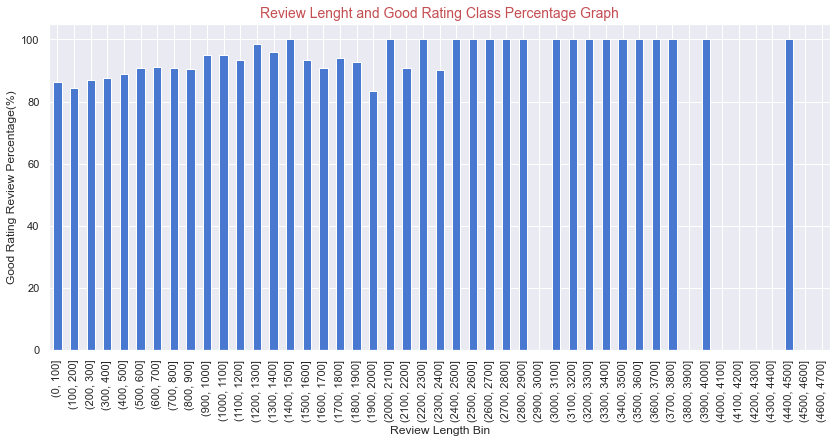

In [57]:
# Plot the graph for good rating class percentage and review length bin
plt.figure(figsize = (14,6))
sns.set_palette('muted')
per_pos_length.plot(kind='bar')
plt.title('Review Lenght and Good Rating Class Percentage Graph', color = 'r', size = 14)
plt.xlabel('Review Length Bin')
plt.ylabel('Good Rating Review Percentage(%)')
plt.show()

2.5 "pos_feedback" Feature

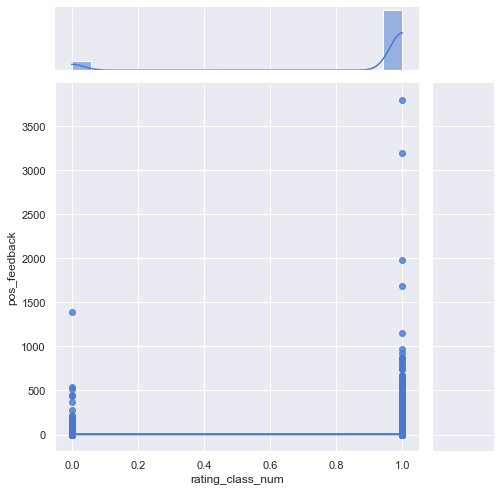

In [58]:
sns.jointplot(x ='rating_class_num', y = 'pos_feedback', data = df, kind = 'reg', size = 7)

2.6 "neg_feedback" Feature

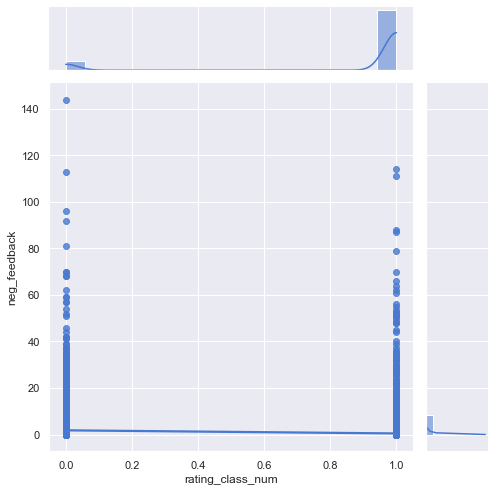

In [59]:
sns.jointplot(x ='rating_class_num', y = 'neg_feedback', data = df, kind = 'reg', size = 7)

Correlation between Numeric variables

<AxesSubplot:>

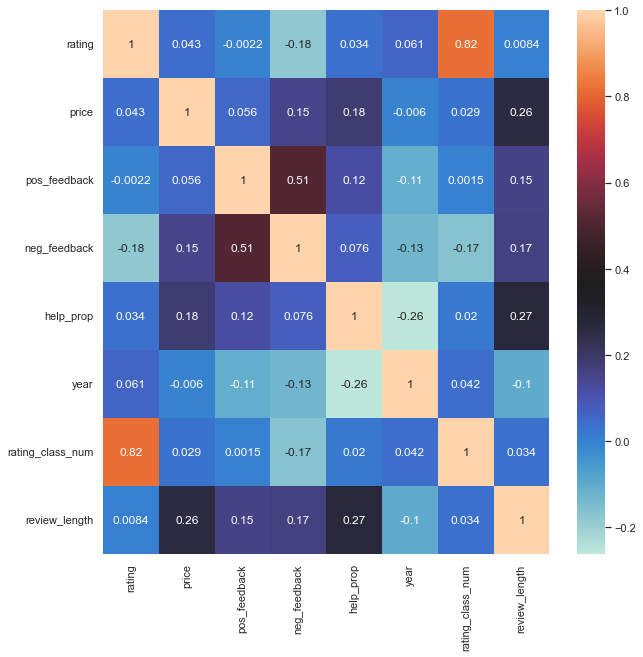

In [60]:
plt.figure(figsize = (10,10))
sns.heatmap(df.corr(method="pearson"), cmap='icefire', annot = True)

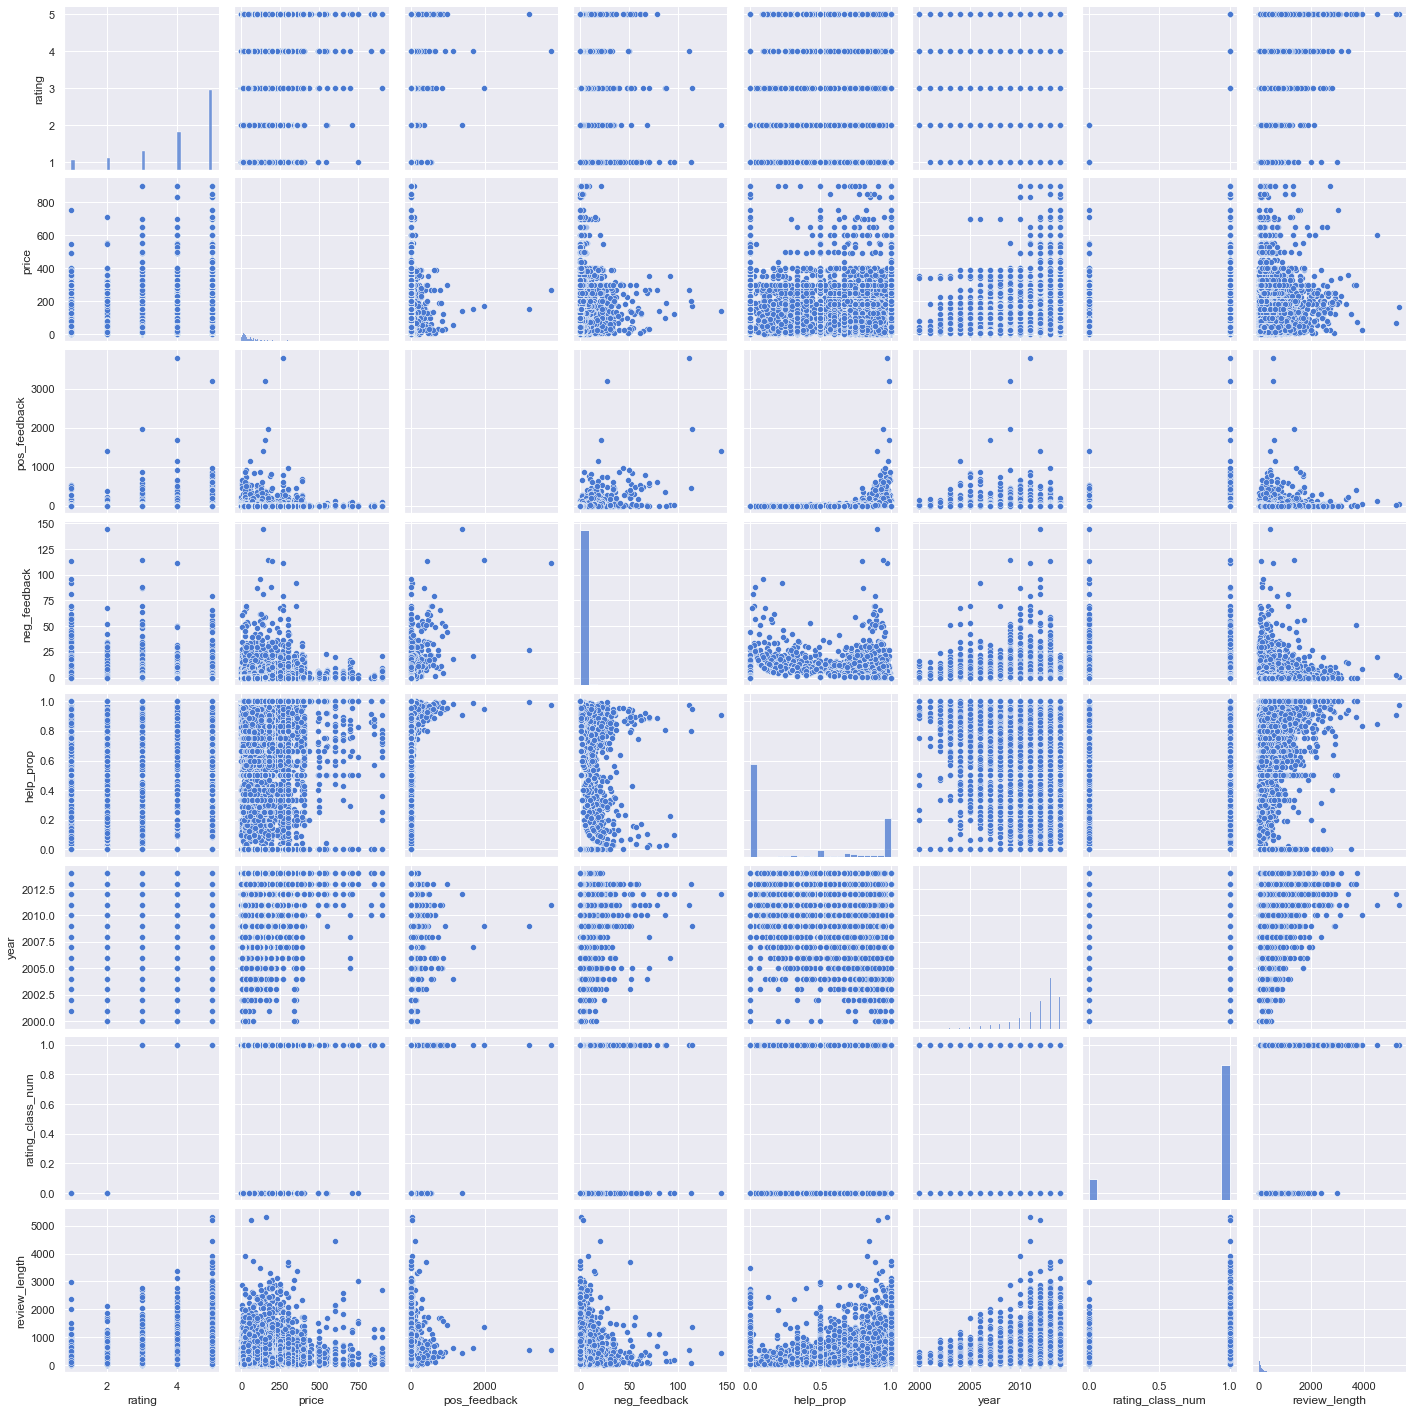

In [61]:
sns.pairplot(df)

In [62]:
df3 = df.drop(df[(df['review_length'] > 150) & (df['rating_class'] == 'good')].index)

In [63]:
df4 = df3.drop(df3[(df3['year'] < 2010)].index)
df4=df4.head(15000)
df4.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15000 entries, 2332 to 712938
Data columns (total 23 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   reviewer_id        15000 non-null  object        
 1   product_id         15000 non-null  object        
 2   reviewer_name      15000 non-null  object        
 3   rating             15000 non-null  int64         
 4   unix_review_time   15000 non-null  datetime64[ns]
 5   url                15000 non-null  object        
 6   description        15000 non-null  object        
 7   categories         15000 non-null  object        
 8   product_title      15000 non-null  object        
 9   price              15000 non-null  float64       
 10  related            15000 non-null  object        
 11  brand_name         15000 non-null  object        
 12  review_text        15000 non-null  object        
 13  pos_feedback       15000 non-null  int64         
 14  ne

In [64]:
df4.head(50)

reviewer_id  product_id                         reviewer_name  \
2332  A1WYKNREHQ30KE  B00000JBHP                  A. Jones "anjsmiles"   
2333  A24PTVSZSM8968  B00000JBHP                       Amazon Customer   
2334   A4DZOJ79D9BXE  B00000JBHP                    Angelina Lotulelei   
2335  A104VHQ06KFLDT  B00000JBHP                      Anthony Whiteman   
2336   AGI34T5QZWBBC  B00000JBHP                          Dee L. "Dee"   
2337  A2NIT6BKW11XJQ  B00000JBHP                                   Jai   
2338  A1BDMSJDPX5MDF  B00000JBHP                                   LDS   
2339  A39KC1FTFJ6WE7  B00000JBHP                Mero Group Hanalei Bay   
2341  A32VSTSDEPUBHU  B00000JBHP                               Mike E.   
2342  A1VJGPW4W8FBFV  B00000JBHP                        Robert E. Howe   
2343   A90CJHEDYOPIW  B00000JBHP                 Robert H. Charbonneau   
2344  A28621TSIR5EOG  B00000JBHP                  Walk Around "Osprey"   
3517  A2NBQ9E181AC8O  B00001P4XA                         Alan Duquette   
3530  A2Y1YSXP0CR3JK  B00001P4XA                    Ayerton Zoutendijk   
3534  A265ELQ8QCGJZ1  B00001P4XA                             B. Linder   
3546  A3479FS9K87E6O  B00001P4XA                     Chaos5061 "Louie"   
3547  A2AAN5OO6QZ905  B00001P4XA                          Chase Holden   
3548  A39JC4OBLTFWYG  B00001P4XA             Chris Meirose "Big Chris"   
3552   A3E6HFD7U91DY  B00001P4XA                      Daniel Burstiner   
3553  A1MXXBKX2AWBR8  B00001P4XA                                 Danip   
3554   AHRXG1I39B1FR  B00001P4XA                           Darth Vader   
3557  A2MG5RDEK195A8  B00001P4XA                                 Derek   
3559  A1HZXIWZ2BFEI9  B00001P4XA                          Devin Colvin   
3578  A3E1IXJ949VL29  B00001P4XA                                   JCR   
3583  A1D45GKC02247Y  B00001P4XA                                 Jerry   
3584  A3P02QITTUA6VH  B00001P4XA                           jman "jman"   
3585  A2X8ORQE9W3GIH  B00001P4XA                                John C   
3586   A8ZVKQT47JSH5  B00001P4XA                                Josh M   
3588   AA7P2NEC94K79  B00001P4XA                             J. Pappan   
3589  A2L44BPVGMB5FD  B00001P4XA                   Julian A. Lopez III   
3597  A1HSGHW38ZSYXN  B00001P4XA                       Kristine Wagner   
3599  A2BQWD54CXBX6R  B00001P4XA  Kym McNabney "Writing From The Soul"   
3600   AWA8NYOA1CPBS  B00001P4XA                            Laytimator   
3601  A3B2DFMVEIT8TS  B00001P4XA                  L. Blumenthal "lynn"   
3602  A2PL7ZNZNA1S68  B00001P4XA                              LimaLima   
3608  A3QY9MCAQ6CRFH  B00001P4XA    mastee "its all about the journey"   
3609  A340RN4767K964  B00001P4XA            Master Card "Canted Valve"   
3622  A30UO2HV1289CO  B00001P4XA                            OCDShopper   
3623  A1THVLECOV14YL  B00001P4XA                         Ornot "Ornot"   
3624   AL47H8L17R0GG  B00001P4XA        P. Adlparvar "Ultra Hi Fi nut"   
3626  A1BIPJK03QKFQA  B00001P4XA           QueenOPearls "QueenOPearls"   
3629   ACGEI811KV9OY  B00001P4XA                            Reed White   
3634  A2GR77INMKX9O4  B00001P4XA                                Robert   
3635  A1S95WASXJ02VX  B00001P4XA                   Roberto Aguilar Jr.   
3636  A146K5OQPHQUMR  B00001P4XA                  Robert Walther "Bob"   
3637  A2WJ5XSE4I9F55  B00001P4XA                      Rocket Scientist   
3640  A1WVIO1Z0N8JG2  B00001P4XA                               R. Ross   
3641  A11LTGLPJ66GTN  B00001P4XA                    Ruby Relic "Linda"   
3643   ABDAL1JFCZSH6  B00001P4XA                              R Wesley   
3645  A22PNO62IYQ4WM  B00001P4XA                               S. Ames   

      rating unix_review_time  \
2332       4       2011-01-10   
2333       4       2013-03-02   
2334       4       2013-06-18   
2335       4       2010-07-10   
2336       5       2014-05-17   
2337       4       2013-03-02   
233

In [65]:
df['review_length'].describe()

count    61129.000000
mean       165.746127
std        206.842017
min          2.000000
25%         53.000000
50%        101.000000
75%        199.000000
max       5330.000000
Name: review_length, dtype: float64

2.7 "clean_text" Feature

In [79]:
# Create a new data frame with clean text and rating class number
df5 = df4[["clean_text", "rating_class_num"]].reset_index()
#df5.head(10)
df5 = df5.head(2000)

In [80]:
countVec = CountVectorizer(ngram_range=(1, 2),binary=True)

In [81]:
df5.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 3 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   index             2000 non-null   int64 
 1   clean_text        2000 non-null   object
 2   rating_class_num  2000 non-null   int64 
dtypes: int64(2), object(1)
memory usage: 47.0+ KB


In [82]:
countVec.fit(df5["clean_text"])

CountVectorizer(binary=True, ngram_range=(1, 2))

In [83]:
transformed_matrix = countVec.transform(df5["clean_text"])

In [84]:
#transformed_matrix.toarray().astype(np.unit8)

In [85]:
names = countVec.get_feature_names()

In [86]:
# Adding a 'rating' column from previous dataframe's rating value
df6 = pd.DataFrame(transformed_matrix.toarray(), columns=names)
df6['rating'] = df5['rating_class_num']

In [87]:
df6['rating'].head()

0    1
1    1
2    1
3    1
4    1
Name: rating, dtype: int64

In [88]:
# Create lists for forming a dataframe summary
feature_names = []
avg_ratings = [] 
rating_counts = []
for name in names:
    if name != 'rating':    
        avg_rating = df6[df6[name]== 1]['rating'].mean()
        rating_count = df6[df6[name]== 1]['rating'].count()
        feature_names.append(name)
        avg_ratings.append(avg_rating)
        rating_counts.append(rating_count)  
    else:
        pass

In [89]:
df_summary = pd.DataFrame({'feature_name':feature_names, 'avg_rating': avg_ratings, 'rating_count':rating_counts})

In [90]:
df_summary

feature_name  avg_rating  rating_count
0                   aa         1.0             1
1              aa open         1.0             1
2                aa qz         1.0             1
3            abilities         1.0             1
4      abilities check         1.0             1
...                ...         ...           ...
45376     zunewill buy         1.0             1
45377               zx         1.0             1
45378    zx headphones         1.0             1
45379               zz         0.0             1
45380           zz top         0.0             1

[45381 rows x 3 columns]

Good rating words

In [91]:
# Words that are commonly used in the reviews which have good ratings
df_good = df_summary.query("rating_count > 20").sort_values(by='avg_rating', ascending=False)[4:50]
df_good.head(50)

feature_name  avg_rating  rating_count
5325                car    1.000000            24
15710         great use    1.000000            21
22526   love headphones    1.000000            23
18485           husband    1.000000            21
26026          not beat    1.000000            47
38271        still work    1.000000            27
22034         long time    1.000000            29
35666            simple    1.000000            40
30540       price great    1.000000            25
44662             worry    1.000000            22
44870   would recommend    1.000000            39
15537  great headphones    0.983051            59
44428        work great    0.977273           132
24357             movie    0.975610            41
15634     great product    0.975610            41
1153              amaze    0.975000            80
15632       great price    0.972973            74
15711       great value    0.972973            37
35258             share    0.972973            37
445          adjustable    0.971429            35
42634             video    0.968750            32
15067   good headphones    0.967742            31
14916          go wrong    0.967742            31
17907  highly recommend    0.967213            61
11667           exactly    0.966102            59
30046          portable    0.965517            58
15177      good product    0.965517            29
36329             solid    0.965517            29
21137       lightweight    0.965217           115
11284        especially    0.964912            57
11719         excellent    0.964539           141
36956  sound headphones    0.964286            28
20436            laptop    0.963636            55
15182      good quality    0.962264            53
2619            balance    0.961538            26
14966         good bass    0.961538            26
43141       watch movie    0.961538            26
34228           satisfy    0.961538            26
20125            kindle    0.960000            25
42482             value    0.960000           100
44308         wonderful    0.960000            25
21506              line    0.958333            24
36944       sound great    0.958333           120
17901            highly    0.958333            72
17117  headphones price    0.958333            48
6112              clear    0.957746            71

In [92]:
wc_good = dict(zip(df_good['feature_name'].tolist(), df_good['avg_rating'].tolist()))

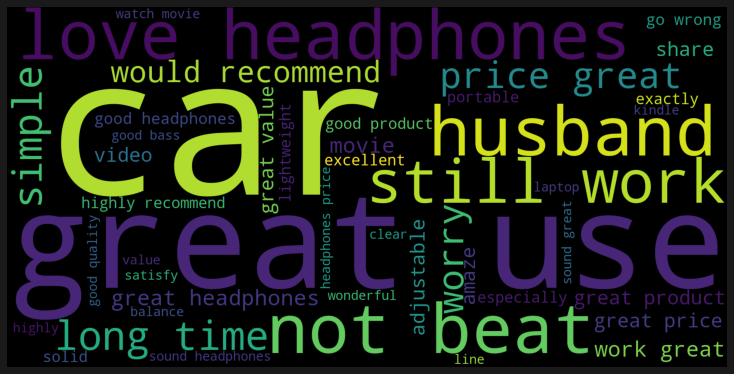

In [101]:
wordcloud = WordCloud(width = 1600, height = 800,
                background_color ='black',
                min_font_size = 10).generate_from_frequencies(wc_good)
 
# plot the WordCloud image                       
plt.figure(figsize = (15, 5),facecolor='k')
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)
plt.show()

Bad rating words

In [102]:
df_bad = df_summary.query("rating_count > 10").sort_values(by= 'avg_rating', ascending=True)[:12]

In [103]:
df_bad.sort_values(by=['avg_rating'],ascending=False,inplace=True)
df_bad

feature_name  avg_rating  rating_count
26281       not make    0.461538            13
5380         careful    0.454545            11
14441        get pay    0.450000            20
26156       not even    0.400000            15
41623  unfortunately    0.333333            18
33475         return    0.326531            49
26564      not worth    0.294118            17
39507       terrible    0.277778            18
7422         contact    0.272727            11
43125          waste    0.250000            16
29939           poor    0.250000            28
42413        useless    0.230769            13

In [104]:
wc_bad = dict(zip(df_bad['feature_name'].tolist(), df_bad['avg_rating'].tolist()))

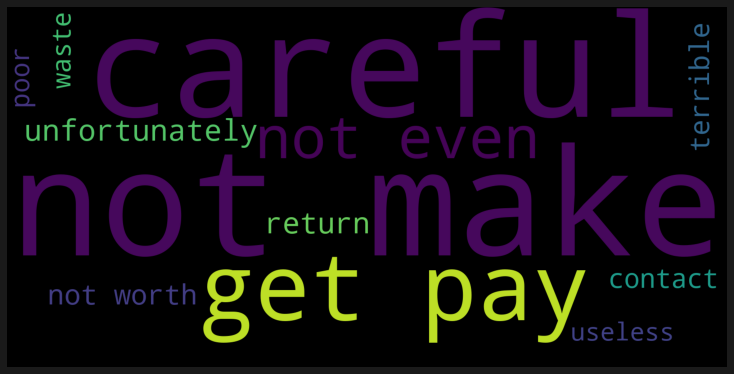

In [105]:
wordcloud = WordCloud(width = 1600, height = 800,
                background_color ='black',
                min_font_size = 10).generate_from_frequencies(wc_bad)
 
# plot the WordCloud image                       
plt.figure(figsize = (15, 5),facecolor='k')
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)
plt.show()

We begin to notice a clear patter in the usage of words when it comes to good and bad reviews at this point<br/>
by simply referring to the word clouds.

In [106]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 61129 entries, 1260 to 1689187
Data columns (total 23 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   reviewer_id        61129 non-null  object        
 1   product_id         61129 non-null  object        
 2   reviewer_name      61129 non-null  object        
 3   rating             61129 non-null  int64         
 4   unix_review_time   61129 non-null  datetime64[ns]
 5   url                61129 non-null  object        
 6   description        61129 non-null  object        
 7   categories         61129 non-null  object        
 8   product_title      61129 non-null  object        
 9   price              61129 non-null  float64       
 10  related            61129 non-null  object        
 11  brand_name         61129 non-null  object        
 12  review_text        61129 non-null  object        
 13  pos_feedback       61129 non-null  int64         
 14  n

In [107]:
df4.to_csv('./Reduced_Cleaned_Reviews_electronics_headphones.csv', sep=',', encoding='utf-8', index = False)